In [1]:
%display latex
import sympy
Parallelism().set(nproc=8)

We are using SageMath version 9.2 or later

In [2]:
version()

'SageMath version 9.3, Release Date: 2021-05-09'

In [3]:
load("non_unimod_dim_3.sage")

# The case of $G_0$


In [4]:
G = non_unimod_dim_3('G_0', 0)
L = G.frame_left_inv()
L0, L1, L2 = L
R = G.frame_right_inv()
R0, R1, R2 = R

Checking that the structure coefficients coincide with the ones of $\mathfrak g_0$

In [5]:
L0.bracket(L1).display(L)

[L_0,L_1] = 0

In [6]:
L2.bracket(L0).display(L)

[L_2,L_0] = L_1

In [7]:
L2.bracket(L1).display(L)

[L_2,L_1] = 2 L_1

## 1. Subcase $g = g_{\mu, \nu}$

We introduce the left invariant metric `g`, which in the frame `L` is given by the matrix
$$
g_{\mu,\nu} = 
\begin{pmatrix}
1 & 0 & 0 \\
0 & \mu & 0 \\
0 & 0 & \nu
\end{pmatrix}, \qquad 0 < \mu, \nu
$$

In [8]:
mu, nu = var('mu nu')
assume(mu>0,nu>0)
g = G.left_inv_metric([1,0,0,0,mu,0,0,0,nu],name=r'g_{\mu,\nu}')
g.comp(L)[:]

[ 1  0  0]
[ 0 mu  0]
[ 0  0 nu]

We verify that the right invariant vector fields are Killing fields

In [9]:
for X in R:
    display(g.lie_derivative(X).display(L))

0

0

0

We compute the intersecion of the orthogonal Lie algebra $\mathfrak{so}(g_{\mu, \nu}) \simeq \mathfrak{so}(3)$ with the pseudo-orthogonal Lie algebra with respecto to the Ricci tensor, $\mathfrak{so}(\operatorname{Ric}) \simeq \mathfrak{so}(2,1)$

In [10]:
g_mat = mat_SR(g.comp(L)[:])
Ric = g.ricci()
Ric_mat = mat_SR(Ric.comp(L)[:]).simplify_full()
g_mat, Ric_mat

(
[ 1  0  0]
[ 0 mu  0]
[ 0  0 nu],

[          -1/2*mu/nu             -2*mu/nu                    0]
[            -2*mu/nu 1/2*(mu^2 - 8*mu)/nu                    0]
[                   0                    0          -1/2*mu - 4]
)

In [11]:
A_list = []
for i in range(3):
    for j in range(3):
        A_list += [var('a'+str(i)+str(j))]
A = matrix(3,3,A_list); A

[a00 a01 a02]
[a10 a11 a12]
[a20 a21 a22]

Equations for $A \in \mathfrak{so}(g_{\mu, \nu})$:

In [12]:
sols_so3 = solve((A.transpose() * g_mat + g_mat * A).list(), A.list(), algorithm='sympy')
A_so3 = A.subs(sols_so3); A_so3

[         0    -a10*mu    -a20*nu]
[       a10          0 -a21*nu/mu]
[       a20        a21          0]

Equations for `A_{so3}` be also an element of $\mathfrak{so}(\operatorname{Ric})$

In [13]:
sols_so3_Ric = solve((A_so3.transpose() * Ric_mat + Ric_mat * A_so3).list(), [a10,a20,a21], algorithm='sympy')
A_so3_Ric = A_so3.subs(sols_so3_Ric); A_so3_Ric

[          0           0 -1/2*a21*nu]
[          0           0  -a21*nu/mu]
[    1/2*a21         a21           0]

Thus, if there exists a Killing field $X$ such that $X_e = 0$, then its covariant derivative must be a multiple of the following matrix:

In [14]:
A_kill = A_so3_Ric.subs(a21=2); A_kill

[       0        0      -nu]
[       0        0 -2*nu/mu]
[       1        2        0]

In order to show that such $X$ exists we can check that $A_{kill} \cdot \nabla^i R = 0$ for $i = 0, 1, 2$, where $R$ is the curvature tensor of $G$.

In [15]:
%time Riem = g.riemann()

CPU times: user 28 µs, sys: 4 µs, total: 32 µs
Wall time: 36.2 µs


Recall that `Riem` is a $(1, 3)$-tensor, which is usually denoted by
$$
R_{X, Y}Z = \nabla_X \nabla_Y Z - \nabla_Y \nabla_X Z - \nabla_{[X, Y]} Z\in \mathfrak X(M)
$$
for $X, Y, Z \in \mathfrak X(M)$

In [16]:
print(Riem)

Tensor field Riem(g_{\mu,\nu}) of type (1,3) on the 3-dimensional differentiable manifold G_0


We prefer working with the associated $(0, 4)$-tensor
$$
(X, Y, Z, W) \mapsto g(R_{X, Y}Z, W)
$$
evaluated at the identity.

In [17]:
Riem1 = Riem.down(g).at(G.zero)
print(Riem1)

Type-(0,4) tensor on the Tangent space at Point e on the 3-dimensional differentiable manifold G_0


For example

In [18]:
e0,e1,e2 = L.at(G.zero)
L_zero = L.at(G.zero)
Riem1(e0,e1,e1,e0)

-1/4*mu^2/nu

Now we define the endomorphism $f$ of $T_eG$ associated with the matrix $A_{kill}$ and verify that $f \cdot R_e = 0$, $f \cdot (\nabla R)_e = 0$ and $f \cdot (\nabla^2 R)_e = 0$

In [19]:
TeG = G.manifold.tangent_space(G.zero)
f = TeG.endomorphism(A_kill)

Recall that if $T$ is an algebraic $(0, k)$-tensor on $T_eG$, then $f \cdot T$ is defined by
$$
(f \cdot T)(v_0, v_1, \ldots, v_{k-1}) = \sum_{i = 0}^k T(v_0, \ldots, v_{i-1}, f(v_i), v_{i+1}, \ldots, v_{k - 1})
$$
for $v_0, \ldots, v_{k-1} \in T_eG$.

In [20]:
def so_action4(f,T,x,y,z,w):
    return T(f(x),y,z,w)+T(x,f(y),z,w)+T(x,y,f(z),w)+T(x,y,z,f(w))

In [21]:
[so_action4(f,Riem1,x,y,z,w) for x in L_zero for y in L_zero for z in L_zero for w in L_zero]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [22]:
nabla = g.connection()

In [23]:
%time nablaRiem = nabla(Riem)

CPU times: user 144 ms, sys: 104 ms, total: 247 ms
Wall time: 4.07 s


In [24]:
%time nablaRiem1 = nablaRiem.down(g).at(G.zero)

CPU times: user 465 ms, sys: 79.4 ms, total: 545 ms
Wall time: 1.07 s


In [25]:
def so_action5(f,T,x,y,z,w,u):
    return T(f(x),y,z,w,u)+T(x,f(y),z,w,u)+T(x,y,f(z),w,u)+T(x,y,z,f(w),u)+T(x,y,z,w,f(u))

In [26]:
nablaRiem1

Type-(0,5) tensor on the Tangent space at Point e on the 3-dimensional differentiable manifold G_0

In [27]:
# long time
%time [so_action5(f,nablaRiem1,x,y,z,w,u) for x in L_zero for y in L_zero for z in L_zero for w in L_zero for u in L_zero]

CPU times: user 4.58 s, sys: 5.48 ms, total: 4.59 s
Wall time: 4.59 s


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [28]:
#long time
%time nabla2Riem = nabla(nablaRiem)

CPU times: user 216 ms, sys: 86.7 ms, total: 302 ms
Wall time: 14.5 s


In [29]:
# long time
%time nabla2Riem1 = nabla2Riem.down(g).at(G.zero)

CPU times: user 1.39 s, sys: 111 ms, total: 1.5 s
Wall time: 3.84 s


In [30]:
nabla2Riem1

Type-(0,6) tensor on the Tangent space at Point e on the 3-dimensional differentiable manifold G_0

In [31]:
def so_action6(f,T,x,y,z,w,u,v):
    return T(f(x),y,z,w,u,v)+T(x,f(y),z,w,u,v)+T(x,y,f(z),w,u,v)+T(x,y,z,f(w),u,v)+T(x,y,z,w,f(u),v)+T(x,y,z,w,u,f(v))

In [32]:
# long time
%time [so_action6(f,nabla2Riem1,x,y,z,w,u,v).simplify_full() for x in L_zero for y in L_zero for z in L_zero for w in L_zero for u in L_zero for v in L_zero]

CPU times: user 1min 1s, sys: 54.9 ms, total: 1min 2s
Wall time: 1min 1s


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

### 1.1 The structure of the isometry Lie algebra

We proved that the Lie algerba of Killing fields $\mathcal K(M, g_{\mu, \nu})$ is spanned by the right invariant vector fields $R_0, R_1, R_2$ and a Killing field $Z$ such that $Z_e = 0$ and $(\nabla Z)_e = A_{kill}$ (with respect to the frame `L`). The initial conditions of the brackets $[R_i, Z]$ are given by
\begin{align*}
[R_i, Z]_e = A_{kill} R_i|_e, && (\nabla [R_i, Z])_e = - [(\nabla R_i)_e, A_{kill}]
\end{align*}
for $i = 0, 1, 2$.

In [33]:
nablaR0 = nabla(R0).at(G.zero).comp()[:]
nablaR1 = nabla(R1).at(G.zero).comp()[:]
nablaR2 = nabla(R2).at(G.zero).comp()[:]
nablaR0, nablaR1, nablaR2, A_kill

(
[        0         0         0]  [        0         0   -1/2*mu]
[        0         0      -1/2]  [        0         0        -2]
[        0 1/2*mu/nu         0], [1/2*mu/nu   2*mu/nu         0],

[      0 -1/2*mu       0]  [       0        0      -nu]
[    1/2       0       0]  [       0        0 -2*nu/mu]
[      0       0       0], [       1        2        0]
)

In [34]:
-(nablaR0 * A_kill - A_kill * nablaR0)

[      0 -1/2*mu       0]
[    1/2       0       0]
[      0       0       0]

Hence, $[R_0, Z] = R_2$

In [35]:
-(nablaR1 * A_kill - A_kill * nablaR1)

[  0 -mu   0]
[  1   0   0]
[  0   0   0]

Hence, $[R_1, Z] = 2 \, R_1$

The bracket $Y = [R_2, Z]$ can be determined in the following way. First, note that $Y_e = A_{kill}e_2 = -\nu e_0 -\frac{2\nu}{\nu}e_1$. So, $(\nabla Y)_e = - \nu (\nabla R_0)_e - \frac{2\nu}{\mu} (\nabla R_1)_e + \alpha A_{kill}$ and we can determine the value of $\alpha$ from the identity $(\nabla Y)_e = -[(\nabla R_2)_e, A_{kill}]$. In other words,
$$
\alpha A_{kill} = -[(\nabla R_2)_e, A_{kill}] + \nu (\nabla R_0)_e + \frac{2\nu}{\mu} (\nabla R_1)_e
$$


In [36]:
-(nablaR2 * A_kill - A_kill * nablaR2) + nu * nablaR0 + 2 * nu / mu * nablaR1

[       0        0    -2*nu]
[       0        0 -4*nu/mu]
[       2        4        0]

Therefore, $[R_2, Z] = - \nu R_0 - \frac{2 \nu}{\mu} R_1 + 2 Z$.

Finally we compute the Killing form of the Lie algebra of Killing vector fields when $\nu = 1$.

In [37]:
structure_coefs = {('r_0','r_2'): {'r_1':1}, ('r_1','r_2'): {'r_1':2}, ('r_0','Z'): {'r_2':1},
    ('r_1','Z'): {'r_2':2}, ('r_2','Z'): {'r_0': -1, 'r_1':-2/mu, 'Z':2}}
k.<r_0,r_1,r_2,Z> = LieAlgebra(SR,structure_coefs)
k

Lie algebra on 4 generators (r_0, r_1, r_2, Z) over Symbolic Ring

In [38]:
display(k.bracket(r_0,r_1))
display(k.bracket(r_0,r_2))
display(k.bracket(r_1,r_2))
display(k.bracket(r_0,Z))
display(k.bracket(r_1,Z))
display(k.bracket(r_2,Z))

0

r_1

2*r_1

r_2

2*r_2

-r_0 - 2/mu*r_1 + 2*Z

In [39]:
k_killing_form = k.killing_form_matrix()
k_killing_form

[        0         0         0        -4]
[        0         0         0        -8]
[        0         0         8         0]
[       -4        -8         0 -8/mu - 2]

In [40]:
k_killing_form.eigenvalues()

[-(mu + sqrt(81*mu^2 + 8*mu + 16) + 4)/mu,
 -(mu - sqrt(81*mu^2 + 8*mu + 16) + 4)/mu,
 0,
 8]

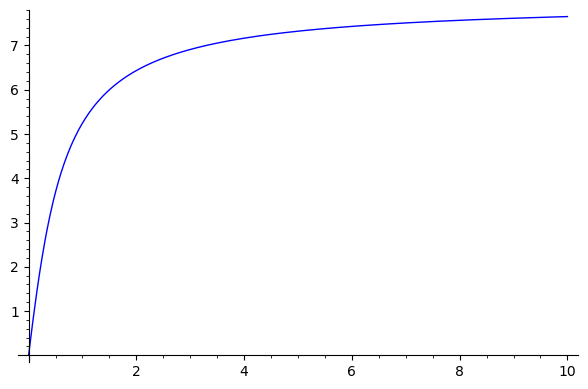

In [41]:
k_killing_form.eigenvalues()[1].plot(mu,0,10)

### 1.2. Index of symmetry

We look for the Killing fields $X$ such that $X_e \neq 0$ and $(\nabla X)_e = 0$

In [42]:
a0, a1, a2 = var('a0 a1 a2')
R_gen = G.right_inv_vect_field(a0,a1,a2,name=r'R_{gen}')
R_gen.display(R)

R_{gen} = a0 R_0 + a1 R_1 + a2 R_2

We can see that if $R_{gen}$ is non-trivial, then $(\nabla R_{gen})_e \neq 0$

In [43]:
nablaR_gen = nabla(R_gen).at(G.zero)
nablaR_gen.comp()[:]

[                    0            -1/2*a2*mu            -1/2*a1*mu]
[               1/2*a2                     0        -1/2*a0 - 2*a1]
[         1/2*a1*mu/nu 1/2*(a0 + 4*a1)*mu/nu                     0]

So, we are actually looking for $a_0, a_1, a_2$ such that $(\nabla R_{gen})_e = \alpha A_{kill}$ for some $\alpha \in \mathbb R$. Moreover, up to rescaling we can assume that $\alpha = 1$.

In [44]:
index_sym_eqs = (nablaR_gen.comp()[:] - A_kill)
index_sym_eqs

[                        0                -1/2*a2*mu           -1/2*a1*mu + nu]
[                   1/2*a2                         0  -1/2*a0 - 2*a1 + 2*nu/mu]
[         1/2*a1*mu/nu - 1 1/2*(a0 + 4*a1)*mu/nu - 2                         0]

In [45]:
index_sym_sols = solve(index_sym_eqs.list(),[a0,a1,a2])
index_sym_sols

[[a0 == -4*nu/mu, a1 == 2*nu/mu, a2 == 0]]

Replacing these values in $R_{gen}$ we can see that the distribution of symmetry of the metric $g_{\mu, \nu}$ (and scaling by a factor of $-\mu / (4 \nu)$) is generated by the left invariant field
$$
L_0 - \frac12 L_1
$$

## 2. Subcase $g = g_{\nu}$

Now we study the metrics `g1`, which in the frame `L` are given by the 
$$
g_{\nu} = 
\begin{pmatrix}
1 & \frac12  & 0 \\
\frac12  & 1 & 0 \\
0 & 0 & \nu
\end{pmatrix}, \qquad 0 < \nu
$$

In [46]:
g_nu = G.left_inv_metric([1,1/2,0,1/2,1,0,0,0,nu],name=r'g_\nu')
g_nu.comp(L)[:]

[  1 1/2   0]
[1/2   1   0]
[  0   0  nu]

In this case we can verify directly that the metric is symmetric.

In [47]:
nabla_nu = g_nu.connection()
Riem_nu = g_nu.riemann()
nabla_Riem_nu = nabla_nu(Riem_nu)

In [48]:
nabla_Riem_nu.display()

nabla_g_\nu(Riem(g_\nu)) = 0